## Part 1: Loading the Dataset; Preliminary Analysis

This part a method is created to load the data set



In [3]:
#imported libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Loading the data set
diamonds = pd.read_csv("diamonds.txt", sep='\t')
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


 Data read from diamonds.txt with pandas have 10 rolls data reading 

In [6]:
#print the shape of the diamonds
shape = diamonds.shape
print(shape)

(53940, 10)


In [7]:
#Display a DataFrame containing descriptive statistics for each of the columns.
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Part 2: Filtering and Sorting
In this part, we will use filtering and sorting techniques to display information for diamonds that satisfy certain criteria.

In [9]:
diamonds[["price", "carat", "cut", "color", "clarity"]].sort_values('price', ascending=False).head(5)

,price,carat,cut,color,clarity
27750,18823,2.29,Premium,I,VS2
27749,18818,2.00,Very Good,G,SI1
27748,18806,1.51,Ideal,G,IF
27747,18804,2.07,Ideal,G,SI2
27746,18803,2.00,Very Good,H,SI1


This will show the information for the five most expensive diamonds in the dataset.

In [11]:
diamonds[["price", "carat", "cut", "color", "clarity"]].sort_values('price', ascending=True).head(5)

,price,carat,cut,color,clarity
1,326,0.23,Ideal,E,SI2
2,326,0.21,Premium,E,SI1
3,327,0.23,Good,E,VS1
4,334,0.29,Premium,I,VS2
5,335,0.31,Good,J,SI2


In [12]:
diamonds[["price", "carat", "cut", "color", "clarity"]].sort_values('carat', ascending=False).head(5)

,price,carat,cut,color,clarity
27416,18018,5.01,Fair,J,I1
27631,18531,4.50,Fair,J,I1
27131,17329,4.13,Fair,H,I1
26000,15223,4.01,Premium,J,I1
25999,15223,4.01,Premium,I,I1


View information about the 5 largest diamonds in the dataset with an ideal cut.

In [14]:
diamonds[["price", "carat", "cut", "color", "clarity"]].sort_values('carat', ascending=True).head(5)


,price,carat,cut,color,clarity
31594,367,0.2,Premium,E,VS2
31598,367,0.2,Ideal,D,VS2
31597,367,0.2,Premium,F,VS2
31596,367,0.2,Ideal,E,VS2
31595,367,0.2,Premium,E,VS2


In [15]:
diamonds[['price', 'carat', 'cut', 'color', 'clarity']][diamonds['cut'] == 'Fair'].sort_values(by='carat', ascending=False).head(5)

,price,carat,cut,color,clarity
27416,18018,5.01,Fair,J,I1
27631,18531,4.50,Fair,J,I1
27131,17329,4.13,Fair,H,I1
23645,11668,3.65,Fair,H,I1
26432,15964,3.40,Fair,D,I1


## Part 3: Working with Categorical Variables
The columns 'cut', 'color', and 'clarity' are categorical variables with levels that represent discrete categories for the diamonds.

In [17]:
# Creating lists to specify the order for each of the three categorical variables
clarity_levels = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
cut_levels = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_levels = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

# Setting the levels of the 'cut', 'color', and 'clarity' columns using pd.Categorical()
diamonds['cut'] = pd.Categorical(diamonds['cut'], cut_levels)
diamonds['color'] = pd.Categorical(diamonds['color'], color_levels)
diamonds['clarity'] = pd.Categorical(diamonds['clarity'], clarity_levels)

#Creating lists of named colors for the categorical variables
clarity_pal = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'gray']
color_pal = ['brown', 'olive', 'gold', 'teal', 'navy', 'lime', 'cyan']
cut_pal = ['black', 'silver', 'chocolate', 'salmon', 'indigo']

## Part 4: Displaying Counts for Categorical Variables
In this part, we will determine the number of diamonds with each level of each of the three categorical variables: cut, color, and clarity.

In [19]:
# Display counts for each level of 'cut'
print(diamonds['cut'].value_counts().sort_index())

cut
Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: count, dtype: int64


This will Display counts for each level of 'color'

In [21]:
# Display counts for each level of 'color'
print(diamonds['color'].value_counts().sort_index())

color
J     2808
I     5422
H     8304
G    11292
F     9542
E     9797
D     6775
Name: count, dtype: int64


This will Display counts for each level of 'clarity'

In [23]:
# Display counts for each level of 'clarity'
print(diamonds['clarity'].value_counts().sort_index())

clarity
I1        741
SI2      9194
SI1     13065
VS2     12258
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
Name: count, dtype: int64


## Part 5: Scatterplots of Price Against Carat
In this part, we will explore the relationship between the price and carat attributes by generating scatter plots.

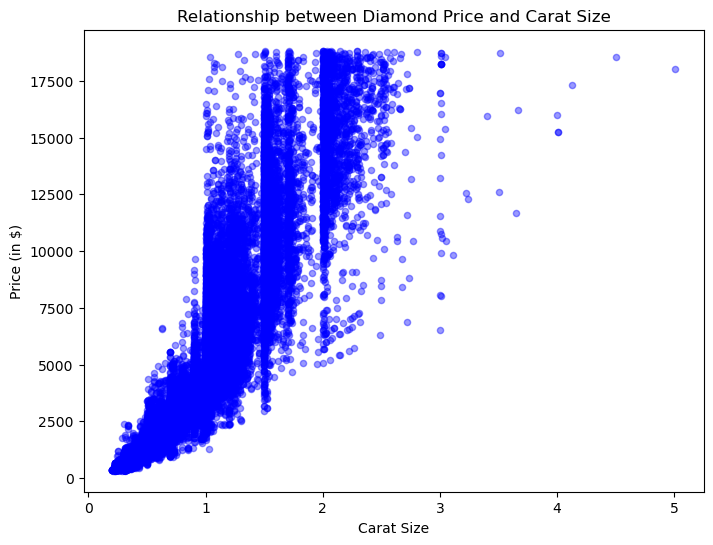

In [25]:
import matplotlib.pyplot as plt

# Scatter plot of price against carat
plt.figure(figsize=[8, 6])
plt.scatter(diamonds['carat'], diamonds['price'], s=20, alpha=0.4, color='blue')
plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title('Relationship between Diamond Price and Carat Size')
plt.show()

## reproduce the plot from above but will color the points according to their clarity.

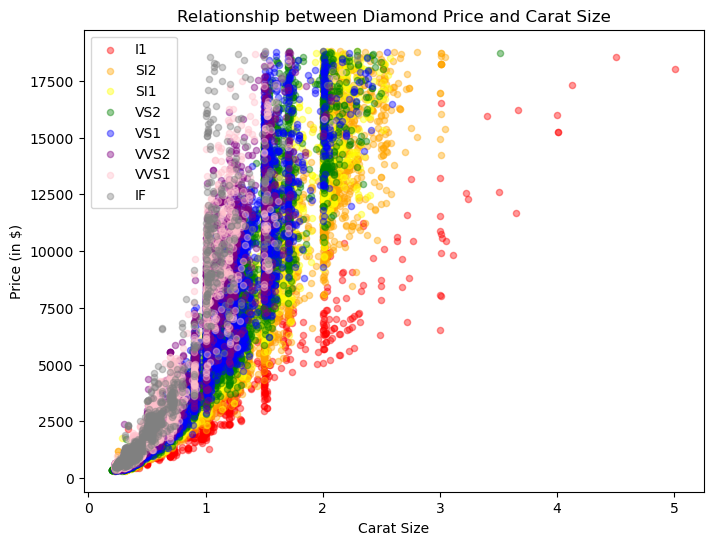

In [27]:
#Scatterplot of price against carat with point color indicating clarity level
plt.figure(figsize=[8, 6])
for level, color in zip(clarity_levels, clarity_pal):
    subset = diamonds[diamonds['clarity'] == level]
    plt.scatter(subset['carat'], subset['price'], s=20, alpha=0.4, color=color, label=level)

plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title('Relationship between Diamond Price and Carat Size')
plt.legend()
plt.show()

## We will now separate the points for each of the eight clarity levels into its own subplot.

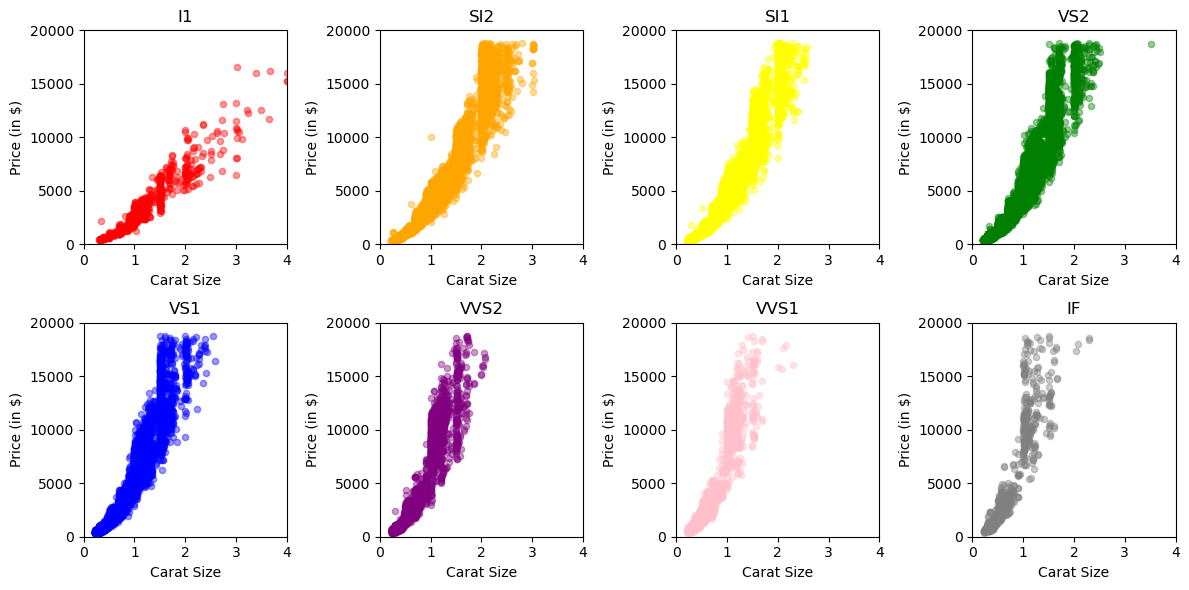

In [29]:
#Separate subplots for each clarity level
plt.figure(figsize=[12, 6])
for i, level in enumerate(clarity_levels):
    plt.subplot(2, 4, i+1)
    level_data = diamonds[diamonds['clarity'] == level]
    plt.scatter(level_data['carat'], level_data['price'], s=20, alpha=0.4, color=clarity_pal[i])
    plt.xlabel('Carat Size')
    plt.ylabel('Price (in $)')
    plt.title(level)
    plt.xlim([0, 4])
    plt.ylim([0, 20000])
plt.tight_layout()
plt.show()


## Part 6: Applying Logarithmic Transformations
We will start by adding two new columns to the diamonds DataFrame to store the transformed variables.

In [31]:
# Add columns for logarithmic transformations
diamonds['ln_carat'] = np.log(diamonds['carat'])
diamonds['ln_price'] = np.log(diamonds['price'])

We will now use histograms to explore the distribution of the diamond prices and the log of the diamond prices.

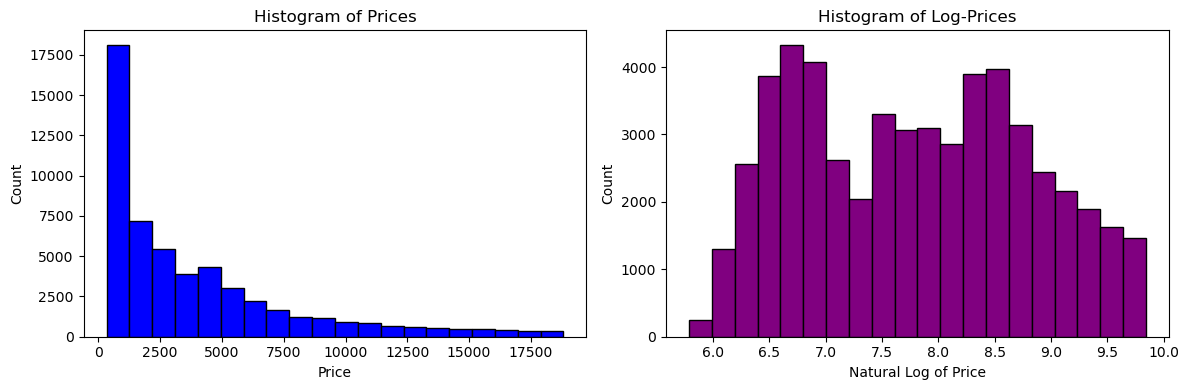

In [33]:
# Histogram of prices and log-prices
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.hist(diamonds['price'], bins=20, edgecolor='black', color='blue')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of Prices')

plt.subplot(1, 2, 2)
plt.hist(diamonds['ln_price'], bins=20, edgecolor='black', color='purple')
plt.xlabel('Natural Log of Price')
plt.ylabel('Count')
plt.title('Histogram of Log-Prices')

plt.tight_layout()
plt.show()

We will now use histograms to explore the distribution of the carat sizes and the log of the carat sizes.

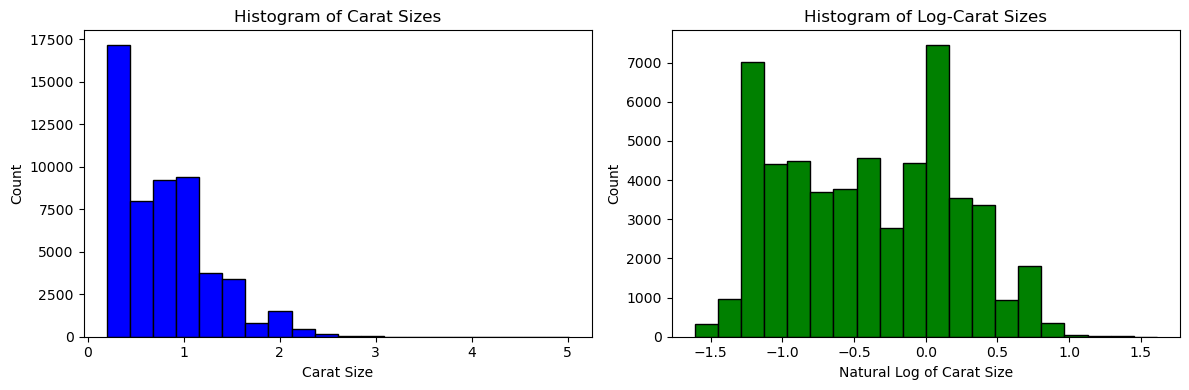

In [35]:
# Histogram of carat sizes and log-carat sizes
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.hist(diamonds['carat'], bins=20, edgecolor='black', color='blue')
plt.xlabel('Carat Size')
plt.ylabel('Count')
plt.title('Histogram of Carat Sizes')

plt.subplot(1, 2, 2)
plt.hist(diamonds['ln_carat'], bins=20, edgecolor='black', color='green')
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Count')
plt.title('Histogram of Log-Carat Sizes')

plt.tight_layout()
plt.show()


## Part 7: Scatterplot of Transformed Variables
In this part, we will create a scatterplot of ln_price against ln_carat, with points colored according to their clarity.

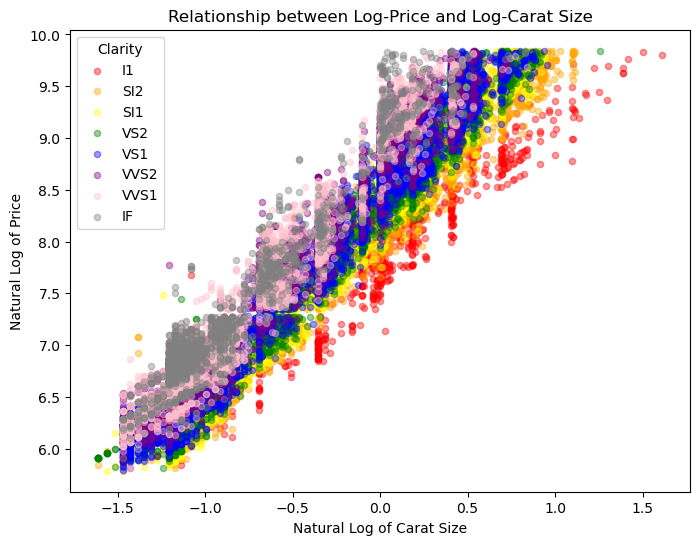

In [37]:
plt.figure(figsize=[8, 6])

for i, level in enumerate(clarity_levels):
    subset = diamonds[diamonds['clarity'] == level]
    plt.scatter(subset['ln_carat'], subset['ln_price'], s=20, alpha=0.4, color=clarity_pal[i], label=level)

plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Natural Log of Price')
plt.title('Relationship between Log-Price and Log-Carat Size')
plt.legend(title='Clarity')
plt.show()


## Part 8: Grouping by Cut
In this part, we will calculate the mean price and carat size for each level of the variable cut.

In [39]:
gb_cut = diamonds.groupby('cut', observed=False)[['price', 'carat']].mean()
gb_cut

,price,carat
cut,,
Fair,4358.757764,1.046137
Good,3928.864452,0.849185
Very Good,3981.759891,0.806381
Premium,4584.257704,0.891955
Ideal,3457.541970,0.702837


use bar charts to graphically display the information from the gb_cut DataFrame.

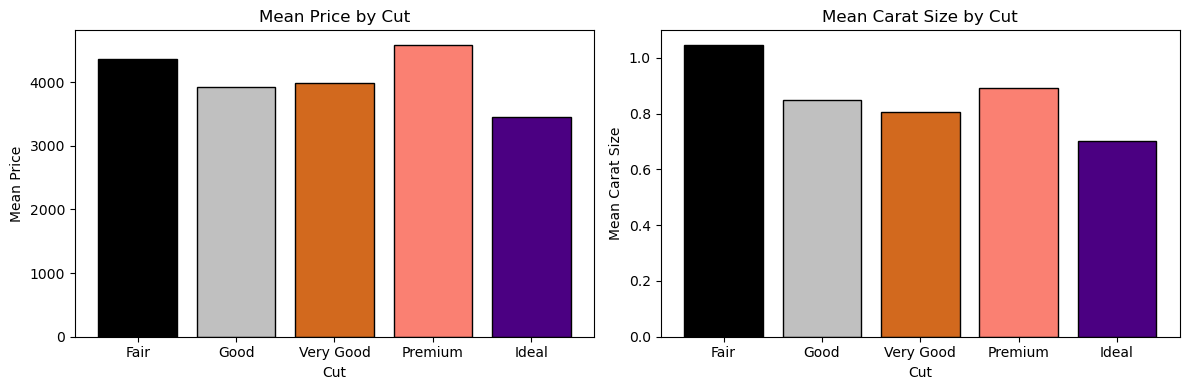

In [41]:
plt.figure(figsize=[12, 4])

plt.subplot(1, 2, 1)
plt.bar(gb_cut.index, gb_cut['price'], edgecolor='black', color=cut_pal)
plt.xlabel('Cut')
plt.ylabel('Mean Price')
plt.title('Mean Price by Cut')

plt.subplot(1, 2, 2)
plt.bar(gb_cut.index, gb_cut['carat'], edgecolor='black', color=cut_pal)
plt.xlabel('Cut')
plt.ylabel('Mean Carat Size')
plt.title('Mean Carat Size by Cut')

plt.tight_layout()
plt.show()


## Part 9: Grouping by Color
In this part, we will calculate the mean price and carat size for each level of the variable color.

In [43]:
gb_color = diamonds.groupby('color', observed=False)[['price', 'carat']].mean()
gb_color

,price,carat
color,,
J,5323.818020,1.162137
I,5091.874954,1.026927
H,4486.669196,0.911799
G,3999.135671,0.771190
F,3724.886397,0.736538
E,3076.752475,0.657867
D,3169.954096,0.657795


use bar charts to graphically display the information from the gb_color DataFrame.

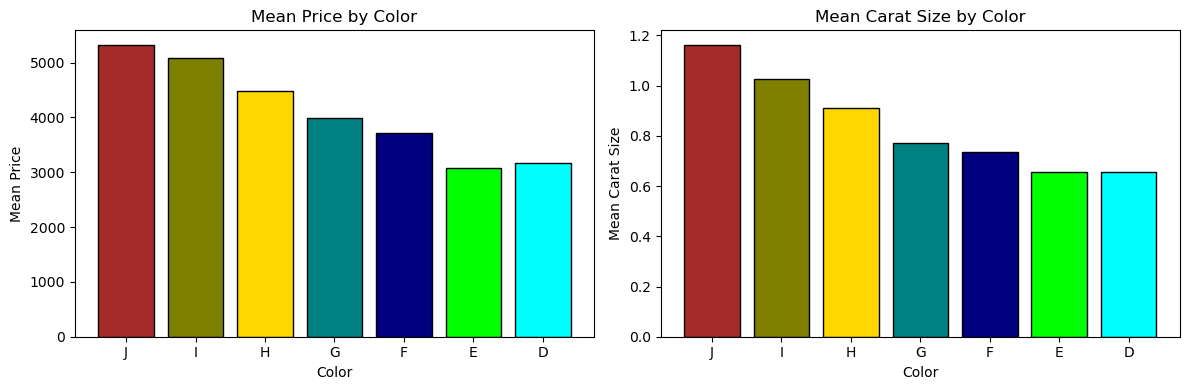

In [45]:
plt.figure(figsize=[12, 4])

plt.subplot(1, 2, 1)
plt.bar(gb_color.index, gb_color['price'], edgecolor='black', color=color_pal)
plt.xlabel('Color')
plt.ylabel('Mean Price')
plt.title('Mean Price by Color')

plt.subplot(1, 2, 2)
plt.bar(gb_color.index, gb_color['carat'], edgecolor='black', color=color_pal)
plt.xlabel('Color')
plt.ylabel('Mean Carat Size')
plt.title('Mean Carat Size by Color')

plt.tight_layout()
plt.show()


## Part 10: Grouping by Clarity
In this part, we will calculate the mean price and carat size for each level of the variable clarity.

In [47]:
gb_clarity = diamonds.groupby('clarity', observed=False)[['price', 'carat']].mean()
gb_clarity


,price,carat
clarity,,
I1,3924.168691,1.283846
SI2,5063.028606,1.077648
SI1,3996.001148,0.850482
VS2,3924.989395,0.763935
VS1,3839.455391,0.727158
VVS2,3283.737071,0.596202
VVS1,2523.114637,0.503321
IF,2864.839106,0.505123


let's use bar charts to graphically display the information from the gb_clarity DataFrame.

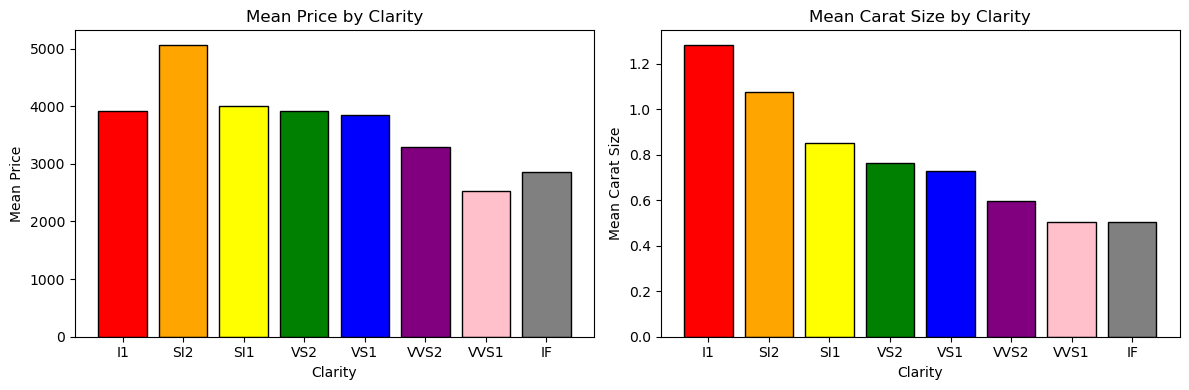

In [49]:
plt.figure(figsize=[12, 4])

plt.subplot(1, 2, 1)
plt.bar(gb_clarity.index, gb_clarity['price'], edgecolor='black', color=clarity_pal)
plt.xlabel('Clarity')
plt.ylabel('Mean Price')
plt.title('Mean Price by Clarity')

plt.subplot(1, 2, 2)
plt.bar(gb_clarity.index, gb_clarity['carat'], edgecolor='black', color=clarity_pal)
plt.xlabel('Clarity')
plt.ylabel('Mean Carat Size')
plt.title('Mean Carat Size by Clarity')

plt.tight_layout()
plt.show()
